In [3]:
import numpy as np
%matplotlib inline

class Elevator:
  
    def __init__(self, n_floors,pickup_destinations, max_passengers):
        '''
        Constructor - takes the number of floors and maximum number of passengers as input,
        saves all the pressed buttons both inside and outside at any given time,
        keeps track of current floor and current passengers
        
        '''
        self.n_floors = n_floors
        self.max_passengers = max_passengers
        self.dropoff_destinations = np.zeros(n_floors) # where people want to go 
        self.pickup_destinations = pickup_destinations # where people are (pressing buttons)
        self.passengers = [] 
        self.current_floor = 0
        self.all_trip_times = [] 
    
    def decide_floor_random(self):
        '''
        Elevator goes to a random floor.
        '''
        return np.random.randint(self.n_floors)
    
    def decide_floor_greedy(self):
        '''
        If there are passengers inside, then elevator goes to nearest destination.
        Otherwise, elevator goes to nearest floor which has passengers.
        '''
        if len(self.passengers) == 0: 
          buttons_pressed = np.nonzero(self.pickup_destinations)[0]
        else:
          buttons_pressed = np.nonzero(self.dropoff_destinations)[0]

        distances = np.abs(buttons_pressed - self.current_floor) 
        closest_floor = buttons_pressed[np.argmin(distances)] # minimum distance 
        return closest_floor
        
    
    def decide_floor(self, strat):
        '''
        Elevator goes to floor based on strategy.
        '''
        if strat == "random":
          return self.decide_floor_random()
        if strat == "greedy":
          return self.decide_floor_greedy()
        
  
    def dropoff(self):
        '''
        Elevator drops off passengers at the current floor.
        Then, it resets the button for that floor inside,
        And keeps track of the total trip time for everyone who gets off.
        '''
        self.dropoff_destinations[self.current_floor] = 0 # resetting button 
        current_passengers = self.passengers.copy()
        for p in current_passengers: 
          if p.destination == self.current_floor: 
            self.all_trip_times.append(p.trip_time) 
            self.passengers.remove(p)            

    def pickup(self,passengers_on_floor):
        '''
        Elevator picks up passengers at the current floor, up to max capacity.
        The buttons for these passengers' destinations are turned on,
        Method returns everyone still on that floor so that building updates.
        '''
        while len(self.passengers) < self.max_passengers and len(passengers_on_floor) > 0: 
          current_passenger = passengers_on_floor.pop() 
          self.dropoff_destinations[current_passenger.destination] = 1 
          self.passengers.append(current_passenger) # remove passengers from floor and put them in the elevator       
        if len(passengers_on_floor) == 0: 
          self.pickup_destinations[self.current_floor] = 0 # resetting button outside 
        return passengers_on_floor #return remaining passengers on floor
    
  
    def visit_floor(self, floor, passengers_on_floor): 
        '''
        This method moves the elevator to the decided floor, 
        Then drops off and picks up passengers.
        '''
        self.current_floor = floor 
        self.dropoff()
        remaining_passengers_on_floor = self.pickup(passengers_on_floor)
        return remaining_passengers_on_floor

class Building:
  
    def __init__(self, passengers_on_floors, n_floors, strat, max_passengers): 
        '''
        Constructor - takes as input the distribution of passengers on floors,
        the number of floors, and the elevator strategy and capacity.
        '''
        self.n_floors = n_floors 
        self.passengers_on_floors = passengers_on_floors
        self.pickup_destinations = np.zeros(n_floors) # where people are (pressing buttons)
        self.strat = strat 
        
        for i, floor in enumerate(passengers_on_floors): 
          if len(floor) != 0: 
            self.pickup_destinations[i] = 1  
            
        self.my_elevator = Elevator(n_floors, self.pickup_destinations, max_passengers)
        
    def run(self, debug): 
        '''
        Main simulation loops - terminates when all passengers reach destination.
        After each elevator trip, updates the total trip time of all passengers
        who have yet to reach their destination (inside or outside elevator)
        '''
        while True: 
          if debug: 
            print("building", self.passengers_on_floors)
            print("elevator", self.my_elevator.passengers)
          if sum(self.my_elevator.dropoff_destinations) == 0 and sum(self.my_elevator.pickup_destinations) == 0:
            print("done!")
            return np.array(self.my_elevator.all_trip_times)
            
          goto_floor = self.my_elevator.decide_floor(self.strat) # floor to go to 
          if debug:
            print(goto_floor, "\n")
          
          current_trip_time = abs(self.my_elevator.current_floor - goto_floor) + 1 # + 1 for open / closing of door 
          
          for p in self.my_elevator.passengers: 
            p.trip_time += current_trip_time 
          for floor in self.passengers_on_floors: 
            for p in floor: 
              p.trip_time += current_trip_time
          remaining_passengers_on_floor = self.my_elevator.visit_floor(goto_floor, self.passengers_on_floors[goto_floor])  #  
          self.passengers_on_floors[goto_floor] = remaining_passengers_on_floor # number of people on floor updated

class Passenger:
  
    def __init__(self, destination, origin):
        '''
        Constructor - takes as input origin and destination of passenger.
        '''
        self.destination = destination
        self.trip_time = 0 #trip time always starts at 0
        self.origin = origin
    
    def __repr__(self):
        '''
        Representation of passenger object for debugging purposes.
        Irrelevant for simulation logic.
        '''
        return f'from {self.origin} to {self.destination}' 
 

class SimulationControl:
  
    def __init__(self, n_floors, n_passengers, strat, max_passengers=3, debug = False):
        '''
        Takes as input number of floors and passengers, strategy,
        maximum capacity of elevator, and optionally debug mode.
        '''
        self.n_floors = n_floors
        self.n_passengers = n_passengers
        self.passengers_on_floors = [[] for i in range(n_floors)] # waiting to board elevator
        self.initialize_passengers()
        self.my_building = Building(self.passengers_on_floors, n_floors, strat, max_passengers)
        self.debug = debug 
        
    def start_simulation(self):
      '''
      Starts the simulation by runnig building's "run" method.
      '''
      return self.my_building.run(self.debug)
    
        
    def initialize_passengers(self):
        '''
        Initializes passengers to have random different origin and destination.
        '''
        # for each passenger, give them a random floor to initalize, and give them a random destination floor
        floors = np.arange(self.n_floors) # 0 to n_floors - 1 
        for i in range(self.n_passengers):
            origin, destination = np.random.choice(floors, 2, replace=False)
            passenger = Passenger(destination, origin)
            self.passengers_on_floors[origin].append(passenger)      

done!
done!


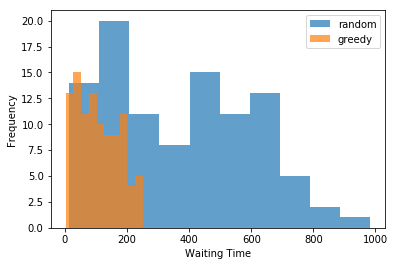

Random Strategy Min: 14
Greedy Strategy Min: 3
Random Strategy Max: 983
Greedy Strategy Max: 251
Random Strategy Mean: 368.36
Greedy Strategy Mean: 106.51


In [4]:
import matplotlib.pyplot as plt


def make_plot(seed,floors,passengers,max_passengers):
  '''
  Takes as input a random seed, number of floors and passengers,
  and elevator capacity. Produces a histogram with frequency of trip times,
  as well as summary statistics for each strategy.
  '''
  np.random.seed(seed)
  r_sim = SimulationControl(floors,passengers,"random",max_passengers).start_simulation()
  plt.hist(r_sim,label="random",alpha=0.7)
  #plt.show()
  g_sim = SimulationControl(floors,passengers,"greedy",max_passengers).start_simulation()
  plt.hist(g_sim,label="greedy",alpha=0.7)
  plt.legend()
  plt.xlabel("Waiting Time")
  plt.ylabel("Frequency")
  plt.show()
  
  print ("Random Strategy Min:", r_sim.min())
  print ("Greedy Strategy Min:", g_sim.min())
  print ("Random Strategy Max:", r_sim.max())
  print ("Greedy Strategy Max:", g_sim.max())
  print ("Random Strategy Mean:", r_sim.mean())
  print ("Greedy Strategy Mean:", g_sim.mean())
  

make_plot(20,10,100,5)